# import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf

# Download Dataset using Kaggle API

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rocksolidkd","key":"1361bfe0bd03af9d0ae76160b381df8b"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 80.7MB/s]


In [6]:
!mkdir delhi-weather-data
!unzip delhi-weather-data.zip -d delhi-weather-data
!ls delhi-weather-data

Archive:  delhi-weather-data.zip
  inflating: delhi-weather-data/testset.csv  
testset.csv


# Read Dataset

In [7]:
df = pd.read_csv('delhi-weather-data/testset.csv')
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [9]:
df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


# Pre Processing

In [10]:
df = df[['datetime_utc', ' _tempm']]

In [11]:
df.head()

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [12]:
df.isnull().sum()

datetime_utc      0
 _tempm         673
dtype: int64

In [13]:
df[' _tempm'].fillna((df[' _tempm'].mean()), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df.isnull().sum()

datetime_utc    0
 _tempm         0
dtype: int64

In [15]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

df_temp = df.set_index('datetime_utc', inplace=False)
df_temp.head()

,_tempm
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


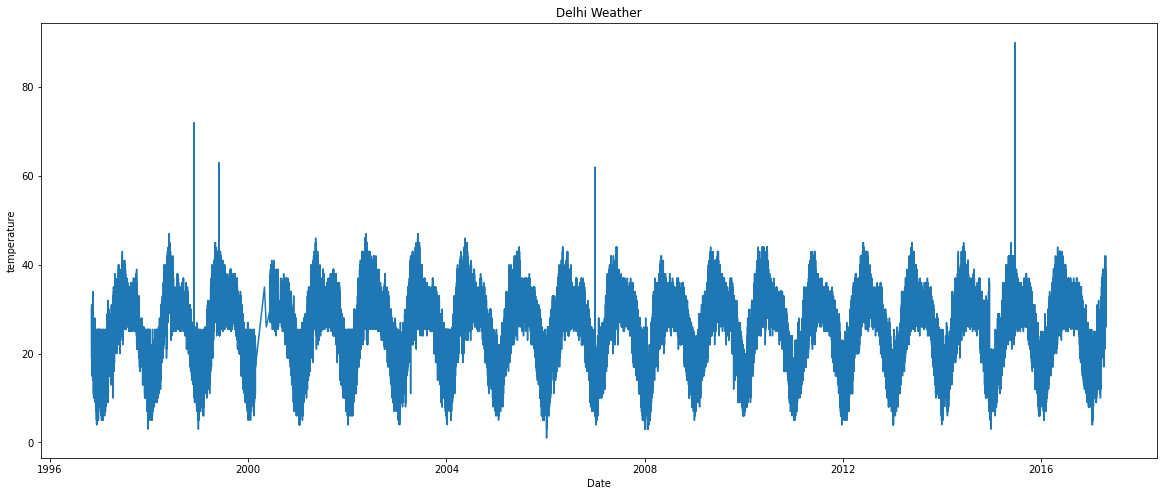

In [16]:
plt.figure(figsize=(20,8))
plt.plot(df_temp)
plt.title('Delhi Weather')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

In [17]:
df_temp = df_temp.resample('D').mean()

In [18]:
df_temp.isna().sum()

 _tempm    141
dtype: int64

In [19]:
df_temp.fillna(df_temp[' _tempm'].mean(),inplace=True)
df_temp.head()

,_tempm
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000


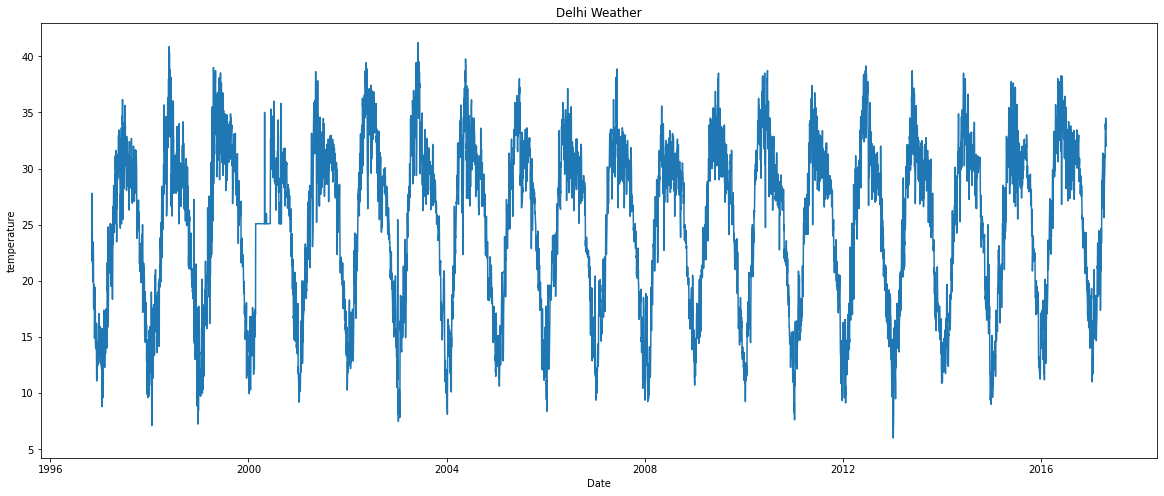

In [20]:
plt.figure(figsize=(20,8))
plt.plot(df_temp)
plt.title('Delhi Weather')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

# Model and Training

In [21]:
x = df['datetime_utc'].values
y = df[' _tempm'].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , shuffle=False)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [29]:
pca = PCA(n_components=0.95)

x_train_reduced = pca.fit_transform(x_train_scaled)
x_test_reduced = pca.transform(x_test_scaled)

In [24]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [53]:
# model
train_set = windowed_dataset(x_train_scaled, window_size=60, batch_size=100, shuffle_buffer=5000)
test_set = windowed_dataset(x_test_scaled, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.Sequential(
    [
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[None, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(8),
        tf.keras.layers.Dense(4),
        tf.keras.layers.Dense(2),
        tf.keras.layers.Dense(1),
    ]
)


In [54]:
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss = tf.keras.losses.Huber(), optimizer = optimizer, metrics = ['mae'])

In [55]:
target = (df_temp[' _tempm'].max() - df_temp[' _tempm'].min()) * (10/100)
print(target)
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('mae') <= target:
            print("\nnilai MAE sudah < 10% dari skala data")
            self.model.stop_training = True
callback = callbacks()

3.5210526315789474


In [56]:
# training
history = model.fit(train_set, epochs = 1000, validation_data=test_set, callbacks=[callback], steps_per_epoch = 1)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 1.1276 - mae: 1.6276
nilai MAE sudah < 10% dari skala data
1/1 [==============================] - 55s 55s/step - loss: 1.1276 - mae: 1.6276 - val_loss: 0.4530 - val_mae: 0.8661
